In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam

In [ ]:
# SINDH : 

Saving Sindh_Updated.csv to Sindh_Updated (56).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              183 non-null    datetime64[ns]
 1   Province_State                    183 non-null    object        
 2   Confirmed Cases (n)               183 non-null    int64         
 3   Recovered Cases (n)               183 non-null    int64         
 4   Active Cases (n)                  183 non-null    int64         
 5   Temp (DegC)                       183 non-null    float64       
 6   Wind (Km/Hr)                      183 non-null    float64       
 7   Hum (%)                           183 non-null    float64       
 8   Mask Use (%)                      183 non-null    float64       
 9   Change in Mobility / Soc Dis (%)  183 non-null    float64       
 1

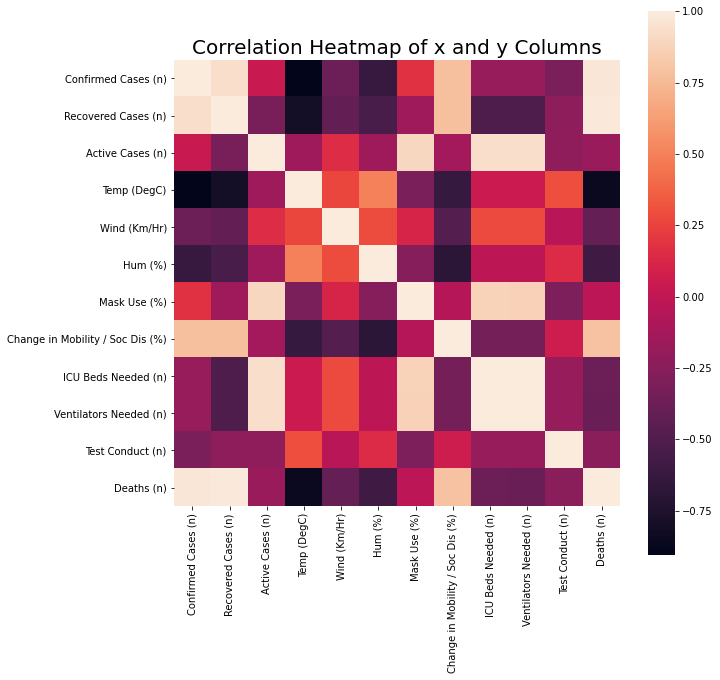

,Confirmed Cases (n),Recovered Cases (n),Active Cases (n),Temp (DegC),Wind (Km/Hr),Hum (%),Mask Use (%),Change in Mobility / Soc Dis (%),ICU Beds Needed (n),Ventilators Needed (n),Test Conduct (n),Deaths (n)
Confirmed Cases (n),1.000000,0.935021,0.035051,-0.904919,-0.382411,-0.625101,0.177644,0.777362,-0.187919,-0.188395,-0.315014,0.976899
Recovered Cases (n),0.935021,1.000000,-0.321601,-0.801412,-0.417676,-0.536580,-0.150911,0.781893,-0.510640,-0.512061,-0.221587,0.986466
Active Cases (n),0.035051,-0.321601,1.000000,-0.157657,0.156043,-0.156775,0.900068,-0.128070,0.937572,0.940301,-0.217488,-0.171758
Temp (DegC),-0.904919,-0.801412,-0.157657,1.000000,0.265226,0.496961,-0.311869,-0.630523,0.042125,0.045694,0.295650,-0.858408
Wind (Km/Hr),-0.382411,-0.417676,0.156043,0.265226,1.000000,0.289948,0.110478,-0.481479,0.285007,0.282688,-0.040882,-0.410563
Hum (%),-0.625101,-0.536580,-0.156775,0.496961,0.289948,1.000000,-0.262453,-0.689004,-0.013240,-0.012147,0.151139,-0.589177
Mask Use (%),0.177644,-0.150911,0.900068,-0.311869,0.110478,-0.262453,1.000000,-0.059306,0.878043,0.870770,-0.295185,-0.020186
Change in Mobility / Soc Dis (%),0.777362,0.781893,-0.128070,-0.630523,-0.481479,-0.689004,-0.059306,1.000000,-0.337082,-0.337171,0.060925,0.797565
ICU Beds Needed (n),-0.187919,-0.510640,0.937572,0.042125,0.285007,-0.013240,0.878043,-0.337082,1.000000,0.999401,-0.187994,-0.383287
Ventilators Needed (n),-0.188395,-0.512061,0.940301,0.045694,0.282688,-0.012147,0.870770,-0.337171,0.999401,1.000000,-0.184641,-0.384162


In [ ]:
# preparing data

from google.colab import files
uploaded = files.upload()
df_sindh = pd.read_csv(list(uploaded.keys())[0], parse_dates=['Date'])

print('\n')
print(df_sindh.info());
print('\n')
print(df_sindh.describe())

dff = df_sindh.corr()

fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Heatmap of x and y Columns', fontsize=20);
sb.heatmap(dff, square = True);
plt.show();

dff

In [ ]:
# data pre processing 

x = df_sindh.iloc[:, 2:-1]
y = df_sindh.iloc[:, -1] 

x = x.drop(['Mask Use (%)','Active Cases (n)'], axis = 1)

print('x data shape : ' , x.shape)
print('y data shape : ' , y.shape)
print('\n')

# xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.1, random_state=1)

tr_sz = int(0.8*len(y))
xtr = x.iloc[0:tr_sz , :]
ytr = y[0:tr_sz]
xts = x.iloc[tr_sz: , :]
yts = y[tr_sz:]

print('x-train data shape : ' , xtr.shape)
print('x-test data shape : ' , xts.shape)
print('y-train data shape : ' , ytr.shape)
print('y-test data shape : ' , yts.shape)

x data shape :  (183, 9)
y data shape :  (183,)


x-train data shape :  (146, 9)
x-test data shape :  (37, 9)
y-train data shape :  (146,)
y-test data shape :  (37,)


In [ ]:
# solving via conventional machine learning model : 

reg = LinearRegression() 
reg.fit(xtr , ytr) 

print('\n Actual-y  : \n' , yts.values)

ypr = reg.predict(xts); # y_predicted 
print('\n Predicted-y using lin reg: \n' , np.round(ypr,2))

ytss = np.array(yts); 
res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ytss[i]-ypr[i])/ytss[i])
err = np.sum(res)/len(yts)
print('\nAccuracy obt from lin reg model : ', (1-np.round(err,2))*100,' %')


 Actual-y  : 
 [2858 2866 2885 2897 2911 2924 2935 2962 2968 2983 2991 3011 3019 3060
 3081 3099 3109 3132 3149 3158 3164 3222 3237 3270 3302 3319 3333 3352
 3379 3419 3440 3462 3469 3491 3502 3520 3533]

 Predicted-y using lin reg: 
 [2879.71 2910.74 2946.92 2951.   2982.39 3018.68 3054.86 3086.81 3131.76
 3174.32 3210.41 3231.62 3253.63 3285.54 3313.06 3338.06 3363.28 3374.13
 3382.73 3406.04 3414.48 3440.12 3484.05 3509.88 3551.31 3585.83 3604.71
 3628.26 3642.38 3659.83 3679.62 3690.45 3710.81 3704.27 3703.81 3741.57
 3773.68]

Accuracy obt from lin reg model :  94.0  %


In [ ]:
# # solving via deep nueral network :  

model = Sequential()

model.add(Dense(128, kernel_initializer='normal',input_shape=(x.shape[1],), activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, kernel_initializer='normal',activation='linear', name='output'))

# optimizer = Adam(lr=0.01)
# optimizer = RMSprop(lr=0.01)
# optimizer = SGD(lr=0.01)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
print(model.summary())

model.fit(xtr, ytr, batch_size=5, epochs=250)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_65 (Dense)             (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 34,561
Trainable params: 34,561
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/250
30/30 [==============================] - 0s 1ms/step - loss: 1255.0357 - mean_squared_error: 2488010.1815
Epoch 2/250
30/30 [==============================] - 0s 1ms/step - loss: 441.9486 - mean_squared_error: 268117.3922
Epoch 3/250
30/30 [==============================] - 0s 1ms/step - loss: 90.9811 - mean_squared_error: 12210.5539
Epoch 4/250
30/30 [=======

In [ ]:
ypred = model.predict(xts)

ya_sindh = np.array(yts)
yp_sindh = np.array(ypred)

print('\nya_sindh ~vs~ yp_sindh')
for i in range(len(yts)): 
  print(ya_sindh[[i]],'vs',yp_sindh[i]) 

res = np.zeros(len(yts));
for i in range(len(yts)): 
  res[i]=(np.abs(ya_sindh[i]-yp_sindh[i])/ya_sindh[i])

err_sindh = np.sum(res)/len(yts)
print('\nAccuracy obt from deep nueral network : ', (1-np.round(err_sindh,2))*100,' %')


ya_sindh ~vs~ yp_sindh
[2858] vs [2828.1528]
[2866] vs [2845.9746]
[2885] vs [2867.1235]
[2897] vs [2883.1748]
[2911] vs [2909.2927]
[2924] vs [2929.984]
[2935] vs [2952.7593]
[2962] vs [2975.0361]
[2968] vs [3002.3044]
[2983] vs [3036.0557]
[2991] vs [3062.934]
[3011] vs [3088.766]
[3019] vs [3116.228]
[3060] vs [3149.7783]
[3081] vs [3178.0862]
[3099] vs [3213.2935]
[3109] vs [3242.6921]
[3132] vs [3269.1748]
[3149] vs [3296.4438]
[3158] vs [3321.6406]
[3164] vs [3343.6997]
[3222] vs [3371.6694]
[3237] vs [3433.557]
[3270] vs [3458.6685]
[3302] vs [3485.1016]
[3319] vs [3500.8936]
[3333] vs [3514.992]
[3352] vs [3526.3108]
[3379] vs [3549.8235]
[3419] vs [3561.7363]
[3440] vs [3572.4736]
[3462] vs [3583.7056]
[3469] vs [3594.7085]
[3491] vs [3603.9082]
[3502] vs [3616.2153]
[3520] vs [3648.9905]
[3533] vs [3688.5583]

Accuracy obt from deep nueral network :  97.0  %


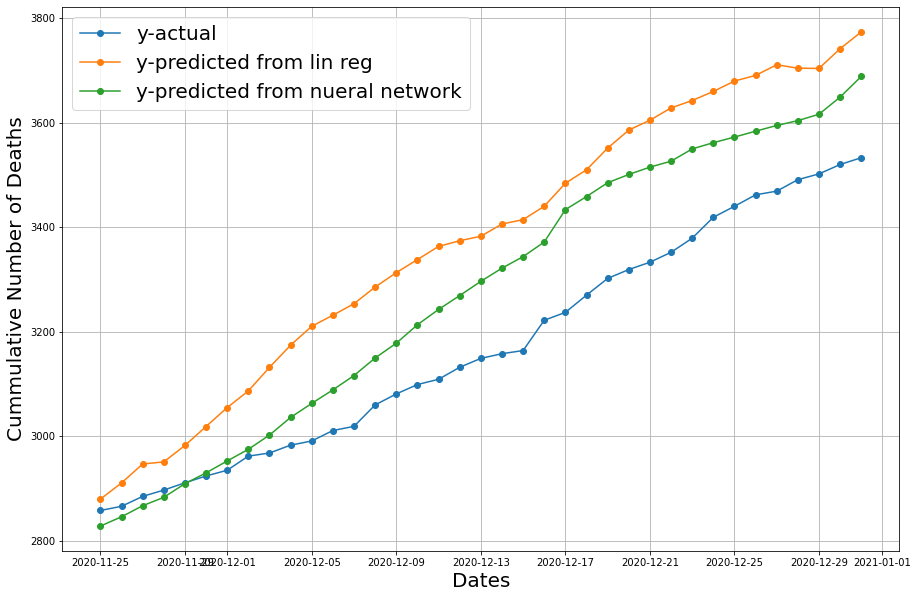

In [ ]:
dts = df_sindh['Date']
end_dts = dts[tr_sz:]

fig2 = plt.figure(figsize = (15,10))
plt.plot(end_dts , ya_sindh, '-o',label='y-actual');
plt.plot(end_dts , ypr, '-o',label='y-predicted from lin reg');
plt.plot(end_dts , yp_sindh, '-o',label='y-predicted from nueral network');
plt.grid(); plt.legend(prop={'size': 20});
plt.xlabel('Dates',fontsize=20); 
plt.ylabel('Cummulative Number of Deaths',fontsize=20); 